Enter Your Patient ID: 1923
Allocating resources for Patient ID 1923:
Option 1: Hospital 99 - Available semi special wards: 29
Option 2: Hospital 63 - Available semi special wards: 23
Option 3: Hospital 75 - Available semi special wards: 27
Option 4: Hospital 38 - Available semi special wards: 11
Option 5: Hospital 47 - Available semi special wards: 19
Option 6: Hospital 93 - Available semi special wards: 30
Option 7: Hospital 32 - Available semi special wards: 25
Option 8: Hospital 82 - Available semi special wards: 26
Option 9: Hospital 5 - Available semi special wards: 24
Option 10: Hospital 86 - Available semi special wards: 18
Option 11: Hospital 69 - Available semi special wards: 25
Option 12: Hospital 68 - Available semi special wards: 11
Option 13: Hospital 21 - Available semi special wards: 15
Option 14: Hospital 33 - Available semi special wards: 21
Option 15: Hospital 39 - Available semi special wards: 23
Option 16: Hospital 100 - Available semi special wards: 30
Option 17: 

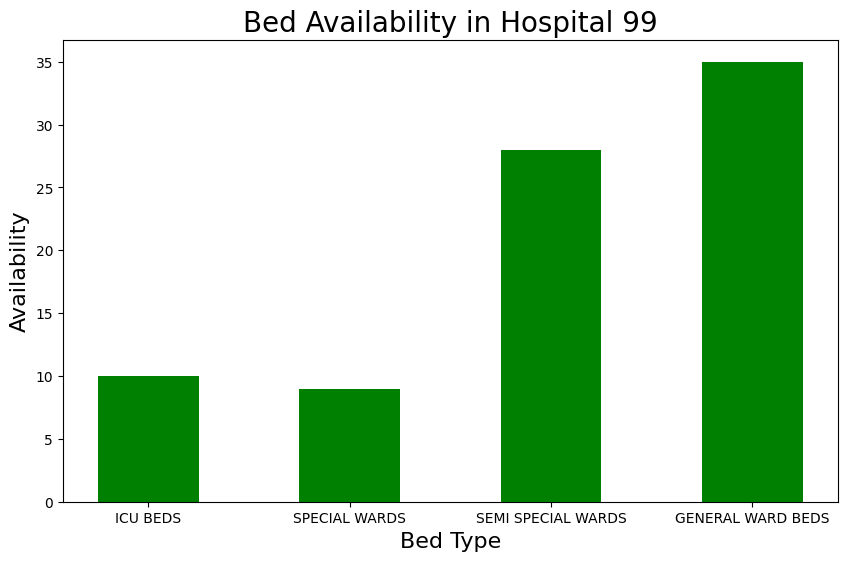

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read patient and hospital data from CSV files
patient_data = pd.read_csv("/content/drive/MyDrive/HACKOUT/patient_data.csv")
hospital_data = pd.read_csv("/content/drive/MyDrive/HACKOUT/hospital_dataset.csv")

# Define a function to allocate a patient to hospitals based on criteria
def allocate_patient(patient_row, hospital_data):
    allocated_beds = []

    patient_age = patient_row['age']
    patient_temperature = patient_row['temperature']
    patient_spo2 = patient_row['pO2_saturation']
    patient_finding = patient_row['finding']

    print(f"Allocating resources for Patient ID {patient_row['patientid']}:")

    # Allocate based on temperature and spo2 levels
    if patient_temperature < 38 and patient_spo2 >= 95:
        print("Advice: Voluntary quarantine and proper medication")

    else:
        matching_hospitals = hospital_data.copy()
        matching_hospitals['distance'] = abs(matching_hospitals['pincode'] - patient_row['Pincode'])
        matching_hospitals = matching_hospitals.sort_values(by=['distance'])

        if patient_finding == 'COVID-19':
            if patient_age > 60:
                allocation_criteria = ['icu_beds', 'special_wards', 'semi_special_wards', 'general_ward_beds']
                print("Advice: Direct ICU or Special/Semi-Special/General ward")

            elif 35 <= patient_age <= 60:
                if patient_temperature == 'Severe':
                    allocation_criteria = ['special_wards', 'semi_special_wards']
                    print("Advice: Special/Semi-Special ward")

                elif patient_temperature == 'Moderate':
                    if patient_spo2 == 'Severe' or patient_spo2 == 'Moderate':
                        allocation_criteria = ['special_wards', 'semi_special_wards']
                        print("Advice: Special/Semi-Special ward")
                    else:
                        allocation_criteria = ['general_ward_beds']
                        print("Advice: General ward")

            else:  # Age < 35
                if patient_temperature == 'Severe' and (patient_spo2 == 'Severe' or patient_spo2 == 'Moderate'):
                    allocation_criteria = ['special_wards', 'semi_special_wards']
                    print("Advice: Special/Semi-Special ward")
                elif patient_temperature == 'Moderate' and (patient_spo2 == 'Severe' or patient_spo2 == 'Moderate'):
                    allocation_criteria = ['semi_special_wards', 'general_ward_beds']
                    print("Advice: Semi-Special/General ward")

        # Display hospital suggestions based on pincode and bed availability
        allocation_criteria = ['semi_special_wards', 'general_ward_beds']
        available_hospitals = []

        for criteria in allocation_criteria:
            for _, hospital in matching_hospitals.iterrows():
                if hospital[criteria] > 0:
                    print(f"Option {len(available_hospitals) + 1}: {hospital['hospital_name']} - Available {criteria.replace('_', ' ')}: {hospital[criteria]}")
                    available_hospitals.append(hospital)

        if available_hospitals:
            choice = int(input("Choose a hospital option: ")) - 1
            if 0 <= choice < len(available_hospitals):
                chosen_hospital = available_hospitals[choice]
                allocated_beds.append((chosen_hospital['hospital_id'], allocation_criteria[0]))
                hospital_data.at[chosen_hospital['hospital_id'] - 1, allocation_criteria[0]] -= 1
                print(f"Allocated Bed - Hospital ID: {chosen_hospital['hospital_id']}, Bed Type: {allocation_criteria[0]}")

    return allocated_beds

n = int(input("Enter Your Patient ID: "))
# Select the row with Patient ID 7132
patient_row = patient_data[patient_data['patientid'] == n].iloc[0]

# Allocate the selected patient to hospitals
allocated_beds = allocate_patient(patient_row, hospital_data)

# Display allocated beds and updated hospital data
print("\nAllocated Beds:")
for bed in allocated_beds:
    print(f"Hospital ID: {bed[0]}, Bed Type: {bed[1]}")

# Update the hospital data CSV file with the allocated beds
hospital_data.to_csv('hospital_allocated.csv', index=False)

# Visualize bed availability using bar graph
def visualize_bed_availability(hospital_name, bed_types, availability):
    plt.figure(figsize=(10, 6))
    plt.bar(bed_types, availability, width=0.5, color ='g')
    plt.xlabel('Bed Type', fontsize=16)
    plt.ylabel('Availability', fontsize=16)
    plt.title(f'Bed Availability in {hospital_name}', fontsize=20)
    plt.show()

# Display bed availability graph for the chosen hospital
if allocated_beds:
    allocated_hospital = hospital_data[hospital_data['hospital_id'] == allocated_beds[0][0]].iloc[0]
    bed_types = ['ICU BEDS','SPECIAL WARDS','SEMI SPECIAL WARDS', 'GENERAL WARD BEDS']
    availability = [allocated_hospital['icu_beds'], allocated_hospital['special_wards'], allocated_hospital['semi_special_wards'], allocated_hospital['general_ward_beds']]
    visualize_bed_availability(allocated_hospital['hospital_name'], bed_types,availability)